In [4]:
from sklearn.decomposition import PCA
import os,codecs,numpy
import matplotlib

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# PROVIDE YOUR DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '/content/drive/MyDrive/Colab Notebooks/SML/SML_A3/mnist/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            type = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (type == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(type == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==10000):
                set = 'test'
            elif (length==60000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY     

Reading  train-images.idx3-ubyte
Reading  train-labels.idx1-ubyte
Reading  t10k-images.idx3-ubyte
Reading  t10k-labels.idx1-ubyte


In [12]:
# this data is of the form 60000, 28, 28

X_train = data_dict['train_images']
Y_train = data_dict['train_labels']

X_test = data_dict['test_images']
Y_test = data_dict['test_labels']


In [13]:
X_train = X_train.reshape(60000, 784)

X_test = X_test.reshape(10000, 784)

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [18]:
# performing the experiment 1

pca1 = PCA(n_components=15)
X_train_r = pca1.fit_transform(X_train)
X_test_r = pca1.transform(X_test)

lda1 = LDA()
lda1.fit(X_train_r, Y_train)
Y_pred = lda1.predict(X_test_r)
acc1 = accuracy_score(Y_test, Y_pred)
print("accuracy in the experiment1:", acc1)

accuracy in the experiment1: 0.8045


In [19]:
# performing the experiment 2

pca2 = PCA(n_components=8)
X_train_r = pca2.fit_transform(X_train)
X_test_r = pca2.transform(X_test)

lda2 = LDA()
lda2.fit(X_train_r, Y_train)
Y_pred = lda2.predict(X_test_r)
acc2 = accuracy_score(Y_test, Y_pred)
print("accuracy in the experiment2:", acc2)

accuracy in the experiment2: 0.7604


In [20]:
# performing the experiment 3

pca3 = PCA(n_components=3)
X_train_r = pca3.fit_transform(X_train)
X_test_r = pca3.transform(X_test)


lda3 = LDA()
lda3.fit(X_train_r, Y_train)
Y_pred = lda3.predict(X_test_r)
acc3 = accuracy_score(Y_test, Y_pred)
print("accuracy in the experiment3:", acc3)

accuracy in the experiment3: 0.466


In [22]:
import numpy as np
import matplotlib.pyplot as plt

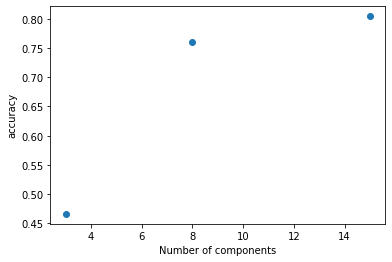

In [23]:
plt.scatter(np.array([15, 8, 3]), np.array([acc1, acc2, acc3]))
plt.xlabel("Number of components")
plt.ylabel("accuracy")
plt.show()

In [24]:
# Reaasoning of the Reason of the fall of the accuracy:
"""
More accuracy is achieved in the case of 15 components(Experiment 1) because as compared to others, here are the most features retained after projection into components. 
the more axis, more features will be retained rather than the crushing of features into one or removal of features. Having more features implies having more information about 
the sample thus would cover different variations in the data and making the model less vulnerable for the encounter of unseen data points. These all things accounts for the
more accuracy of the Experiment with more number of dimensions.
"""

'\nMore accuracy is achieved in the case of 15 components(Experiment 1) because as compared to others, here are the most features retained after projection into components. \nthe more axis, more features will be retained rather than the crushing of features into one or removal of features. Having more features implies having more information about \nthe sample thus would cover different variations in the data and making the model less vulnerable for the encounter of unseen data points. These all things accounts for the\nmore accuracy of the Experiment with more number of dimensions.\n'